## Loading the datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
spi_matches=pd.read_csv('Data/spi_matches.csv')
data=pd.read_csv('Data/spi_matches.csv')
spi_global_teams=pd.read_csv('Data/spi_global_rankings.csv')
spi_global_nations=pd.read_csv('Data/spi_global_rankings_intl.csv')


### Exploratory Data Analysis

In [2]:
pd.set_option('display.max_columns', None)
display(spi_matches.tail())


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
32246,2020-05-24,1869,Spanish Primera Division,Villarreal,Eibar,73.84,73.46,0.4872,0.2588,0.2540,1.64,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32247,2020-05-24,1871,Spanish Segunda Division,Las Palmas,Extremadura UD,36.80,31.54,0.4904,0.2091,0.3004,1.38,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32248,2020-05-24,1871,Spanish Segunda Division,Numancia,Tenerife,29.52,30.98,0.4367,0.2657,0.2977,1.36,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32249,2020-05-24,1871,Spanish Segunda Division,Elche,Real Oviedo,32.18,30.04,0.4768,0.2473,0.2759,1.56,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32250,2020-05-24,1871,Spanish Segunda Division,Real Zaragoza,SD Ponferradina,37.74,29.92,0.5405,0.2037,0.2558,1.76,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
spi_matches.shape

(32251, 22)

* We notice that the data frame has 32,251 rows and 22 columns.

In [4]:
spi_global_teams.head()

,rank,prev_rank,name,league,off,def,spi
0,1,1.0,Manchester City,Barclays Premier League,3.29,0.22,95.22
1,2,2.0,Bayern Munich,German Bundesliga,3.22,0.36,93.30
2,3,3.0,Liverpool,Barclays Premier League,2.92,0.27,92.78
3,4,4.0,Paris Saint-Germain,French Ligue 1,2.75,0.41,89.51
4,5,5.0,Barcelona,Spanish Primera Division,2.80,0.49,88.64


In [5]:
spi_global_nations.head()

,rank,name,confed,off,def,spi
0,1,Spain,UEFA,3.40,0.58,90.93
1,2,Brazil,CONMEBOL,2.91,0.37,90.65
2,3,Germany,UEFA,3.11,0.59,88.78
3,4,Belgium,UEFA,2.95,0.56,87.97
4,5,Argentina,CONMEBOL,2.57,0.42,86.98


### Matches by league

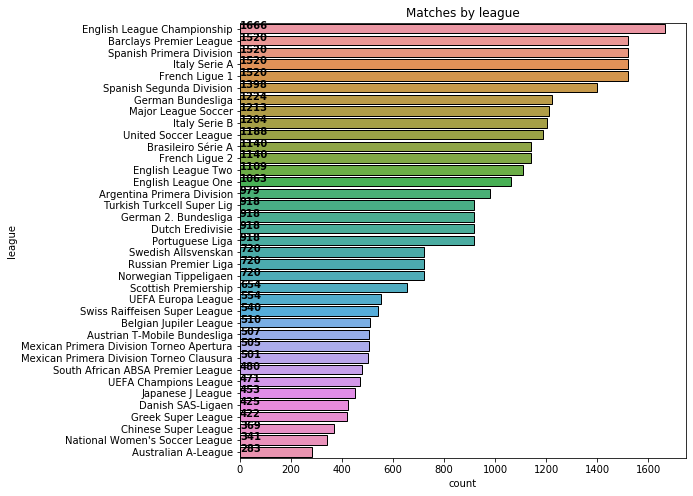

In [6]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique())
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

### Top 25 teams by their home goals

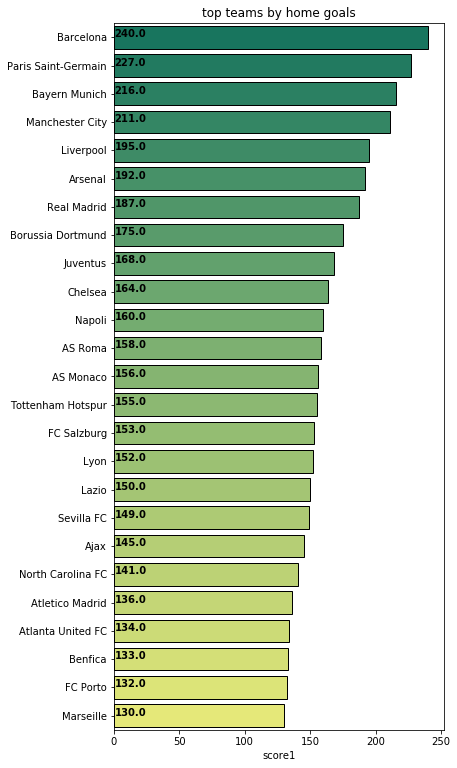

In [7]:

h_t = data.groupby("team1")["score1"].sum().reset_index()
a_t = data.groupby("team2")["score2"].sum().reset_index()
h_t = h_t.sort_values(by="score1",ascending= False)
a_t = a_t.sort_values(by="score2",ascending= False)
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="team1",x="score1",
                 data=h_t[:25],palette="summer",
                 linewidth = 1,edgecolor = "k"*25)
plt.ylabel('')
plt.title("top teams by home goals")
for i,j in enumerate(h_t["score1"][:25]):
    ax.text(.7,i,j,weight = "bold")

### Top 25 teams by their away goals

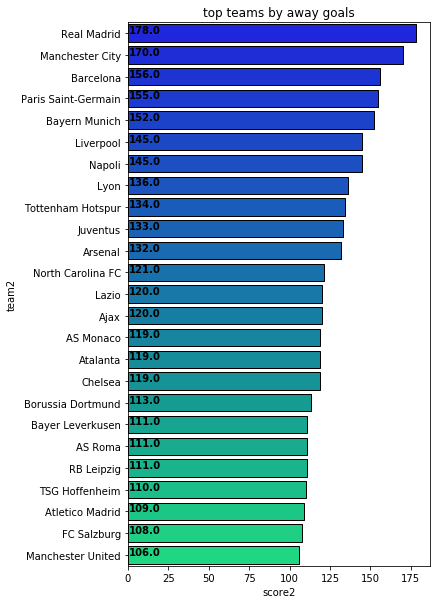

In [8]:
plt.figure(figsize=(13,10))
plt.subplot(122)
ax = sns.barplot(y="team2",x="score2",
                 data=a_t[:25],palette="winter",
                linewidth = 1,edgecolor = "k"*25)
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")
for i,j in enumerate(a_t["score2"][:25]):
    ax.text(.7,i,j,weight = "bold")

### Teams with most goals

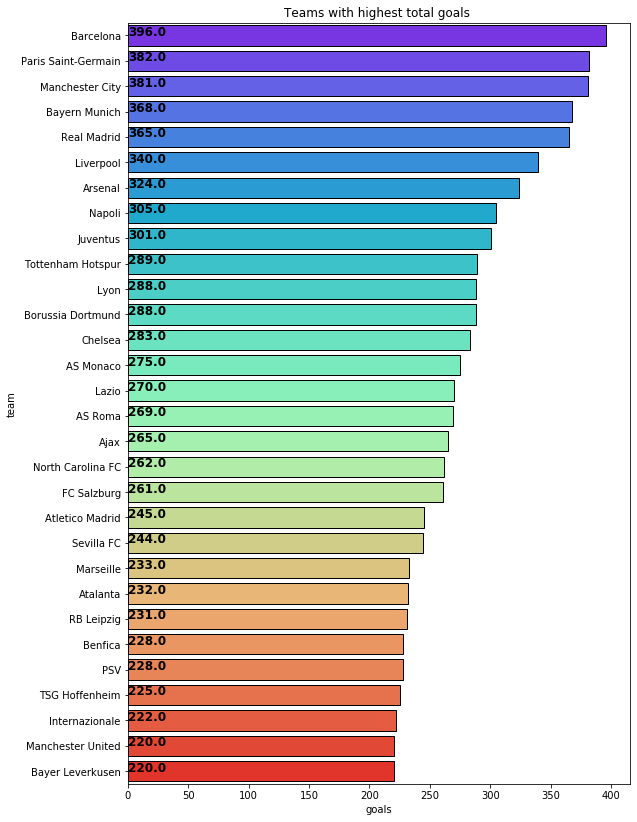

In [9]:
x = h_t
x = x.rename(columns={'team1':"team", 'score1':"goals"})
y = a_t
y = y.rename(columns={'team2':"team", 'score2':"goals"})
goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Teams with highest total goals ")
plt.show()

### Distribution of home and away goals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


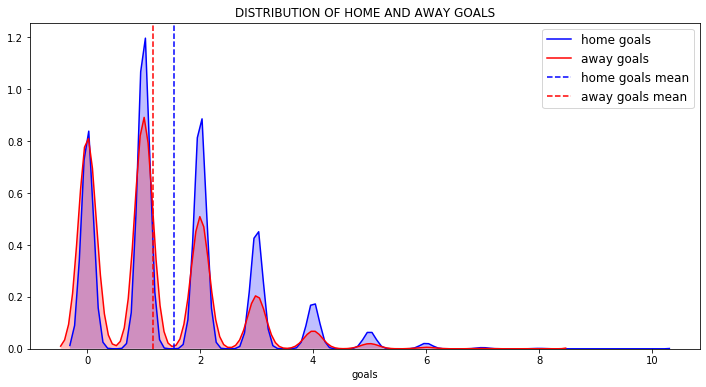

In [10]:
plt.figure(figsize=(12,6))
sns.kdeplot(data["score1"],shade=True,
            color="b",label="home goals")
sns.kdeplot(data["score2"],shade=True,
            color="r",label="away goals")
plt.axvline(data["score1"].mean(),linestyle = "dashed",
            color="b",label="home goals mean")
plt.axvline(data["score2"].mean(),linestyle = "dashed",
            color="r",label="away goals mean")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("DISTRIBUTION OF HOME AND AWAY GOALS")
plt.xlabel("goals")
plt.show()

## Feature Engineering

* The spi global nations isn't very relevant to our case since we are interested in predicting scores for local teams.

* Now we will drop irrelevant columns in the dataframe using the following command

In [11]:
spi_matches.drop(columns=['date','league_id','league']);

In [12]:
spi_matches.describe()

,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,32251.000000,32251.000000,32251.00000,32251.000000,32251.000000,32251.000000,32251.000000,32251.000000,21629.000000,21629.000000,25825.000000,25825.000000,14181.000000,14181.000000,14181.000000,14181.000000,14181.000000,14181.000000
mean,2135.210691,45.066728,45.01814,0.452426,0.294348,0.253226,1.528278,1.156169,31.074886,30.365537,1.532933,1.169952,1.500204,1.148975,1.416583,1.128834,1.550166,1.176223
std,707.371437,19.012871,18.99903,0.158424,0.142470,0.047001,0.428594,0.421931,25.957990,25.566858,1.282119,1.134453,0.826591,0.720711,0.651157,0.568315,1.251790,1.122378
min,1818.000000,3.880000,4.04000,0.027100,0.003200,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1849.000000,31.310000,31.32000,0.352350,0.201300,0.235100,1.250000,0.890000,10.700000,10.300000,1.000000,0.000000,0.880000,0.610000,0.960000,0.730000,1.050000,0.000000
50%,1871.000000,42.920000,42.81000,0.444000,0.278500,0.261000,1.460000,1.110000,25.900000,25.100000,1.000000,1.000000,1.370000,1.020000,1.320000,1.040000,1.050000,1.050000
75%,2160.000000,58.520000,58.42000,0.541500,0.368400,0.282100,1.730000,1.370000,45.100000,44.200000,2.000000,2.000000,1.970000,1.540000,1.760000,1.430000,2.100000,2.100000
max,5641.000000,96.570000,96.78000,0.977500,0.899500,0.453700,4.900000,4.220000,100.000000,100.000000,10.000000,8.000000,7.070000,6.200000,6.580000,5.920000,9.150000,7.930000


* Now we will merge the spi matches with the spi_gloabl_teams in order to get the offensive rating for teams playing the game

In [13]:
spi_matches1 = pd.merge(spi_matches, spi_global_teams[['name','off']], left_on='team1', right_on="name",how='left')

In [14]:
spi_matches1.rename(columns={"off": "off_team1"})
del spi_matches1['name']

In [15]:
spi_matches2 = pd.merge(spi_matches1, spi_global_teams[['name','off']], left_on='team2', right_on="name",how='left')

In [16]:
spi_matches2.columns

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2', 'off_x', 'name', 'off_y'],
      dtype='object')

In [17]:
spi_matches2.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,off_x,name,off_y
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05,NaN,Paris Saint-Germain,2.75
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10,1.85,Guingamp,1.35
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05,1.34,Leicester City,2.01
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05,1.90,West Bromwich Albion,1.66
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05,1.98,Tottenham Hotspur,2.33


* spi_matches2 is our new data frame that includes the offensive rating for team1 and team2

* Now we will remove missing values for the columns that we are going to use as our features

In [18]:
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['score1'])]
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['score2'])]
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['importance1'])]
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['importance2'])]
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['off_x'])]
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['off_y'])]

* Now we are going to plot score1 vs score2 for 

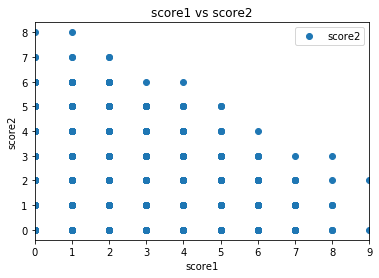

In [19]:
spi_matches2.plot(x='score1', y='score2', style='o')  
plt.title('score1 vs score2')  
plt.xlabel('score1')  
plt.ylabel('score2')  
plt.show()
plt.close()

In [20]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(spi_matches2['score1'])


NameError: name 'seabornInstance' is not defined

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.close()

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(spi_matches2['score2'])
#plt.close()

In [ ]:
plt.close()

In [ ]:
spi_matches2.shape

In [ ]:
spi_matches2.isnull().any()

In [ ]:
# Now we will impude the missing values by taking the average for each column.
#spi_matches2['importance1'] = spi_matches2['importance1'].fillna(spi_matches2['importance1'].mean())
#spi_matches2['importance2'] = spi_matches2['importance2'].fillna(spi_matches2['importance2'].mean())
#spi_matches2['xg1'] = spi_matches2['xg1'].fillna(spi_matches2['xg1'].mean())
#spi_matches2['xg2'] = spi_matches2['xg2'].fillna(spi_matches2['xg2'].mean())
#spi_matches2['nsxg1'] = spi_matches2['nsxg1'].fillna(spi_matches2['nsxg1'].mean())
#spi_matches2['nsxg2'] = spi_matches2['nsxg2'].fillna(spi_matches2['nsxg2'].mean())
#spi_matches2['adj_score1'] = spi_matches2['adj_score1'].fillna(spi_matches2['adj_score1'].mean())
#spi_matches2['adj_score2'] = spi_matches2['adj_score2'].fillna(spi_matches2['adj_score2'].mean())

In [ ]:
# spi_matches2 = spi_matches2.fillna(method='ffill')

In [ ]:
spi_matches2.isnull().any()

In [ ]:
spi_matches2.head()